# Westbound traffic on the I-94 Interstate Highway

The goal of this analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

In [1]:
#Read dataset
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic.head(5))
print(traffic.tail(5))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


From the above, we can see that there are 9 columns in the dataset.

# Analyzing traffic data

We will plot a histogram to visualize the distribution of the traffic volume column.

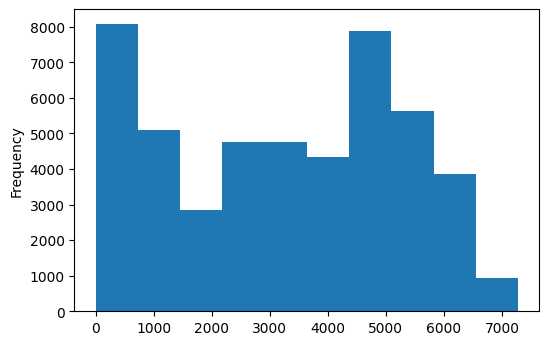

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()

In [4]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Based on the distribution above:

1. About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
2. About 75% of the time, the traffic volume was 4,933 cars or fewer. The remaining 25% of the time, the traffic volume exceeded 4,933 cars.

# Traffic volume: Day vs Night

Previously, we have determined that there is a possibility that nighttime and daytime might influence traffic volume. We'll start by dividing the dataset into two parts:

1. Daytime data: hours from 7 a.m. to 7 p.m. (12 hours) 
2. Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [5]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
print(traffic['date_time'])

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]


In [6]:
traffic['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [7]:
daytime = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(daytime)

      holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0        None  288.28     0.00      0.0          40       Clouds   
1        None  289.36     0.00      0.0          75       Clouds   
2        None  289.58     0.00      0.0          90       Clouds   
3        None  290.13     0.00      0.0          90       Clouds   
4        None  291.14     0.00      0.0          75       Clouds   
...       ...     ...      ...      ...         ...          ...   
48194    None  283.84     0.00      0.0          75         Rain   
48195    None  283.84     0.00      0.0          75      Drizzle   
48196    None  284.38     0.00      0.0          75         Rain   
48197    None  284.79     0.00      0.0          75       Clouds   
48198    None  284.20     0.25      0.0          75         Rain   

           weather_description           date_time  traffic_volume  
0             scattered clouds 2012-10-02 09:00:00            5545  
1                broken clouds 2012-10-02 10:

In [8]:
nighttime = traffic[((traffic['date_time'].dt.hour >= 19) & (traffic['date_time'].dt.hour <= 23)) | ((traffic['date_time'].dt.hour >= 0) & (traffic['date_time'].dt.hour < 7))]
print(nighttime)

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
10       None  290.97      0.0      0.0          20        Clouds   
11       None  289.38      0.0      0.0           1         Clear   
12       None  288.61      0.0      0.0           1         Clear   
13       None  287.16      0.0      0.0           1         Clear   
14       None  285.45      0.0      0.0           1         Clear   
...       ...     ...      ...      ...         ...           ...   
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description           date_time  traffic_volume  
10                 few clouds 2012-10-02 19:00:00            3539  
11               sky is clear 2012-

Text(0, 0.5, 'Frequency')

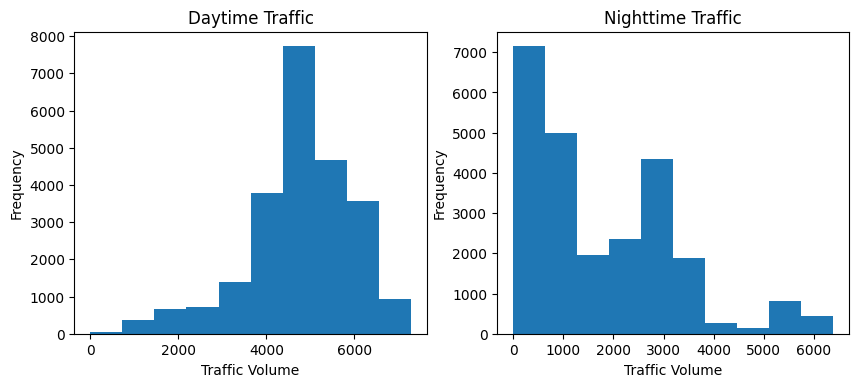

In [9]:
#Plot histograms fro both day and night
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.title('Daytime Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.title('Nighttime Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

Based on both plots:

1. Both plots have a skewed distribution.
2. Traffic at night is light, but our goal is to find indicators of heavy traffic, therefore, nighttime data is not reliable.

# Time indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

1. Month
2. Day of the week
3. Time of day

In [10]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the above, we can clearly see that traffic volume is much lower during the night.

In [12]:
daytime['month'] = daytime['date_time'].dt.month #traffic volume for each month 
by_month = daytime.groupby('month').mean() #groups traffic volume by month 
by_month['traffic_volume']

<ipython-input-12-50255a933eeb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

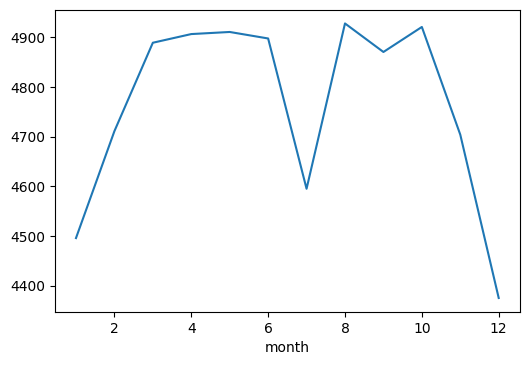

In [13]:
by_month['traffic_volume'].plot.line(x='Month',y='Traffic Volume')
plt.show()

The line plot shows that the highest traffic volume was during the months of August and November and experienced the lowest volume in December.

In [14]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek #traffic volume for each day
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-14-b899ff6f3003>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

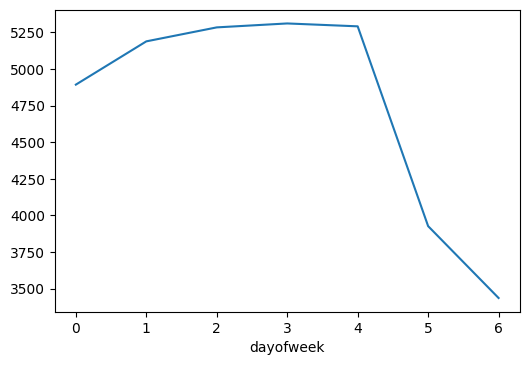

In [15]:
by_dayofweek['traffic_volume'].plot.line(x='Day',y='Traffic Volume')
plt.show()

Traffic volume is higher during business days compared to weekends. This is because on business days people are commuting to and from work whereas on weekends people don't work as often.

In [16]:
daytime['hour'] = daytime['date_time'].dt.hour #hourly traffic volume
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-16-98387398e048>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Traffic Volume')

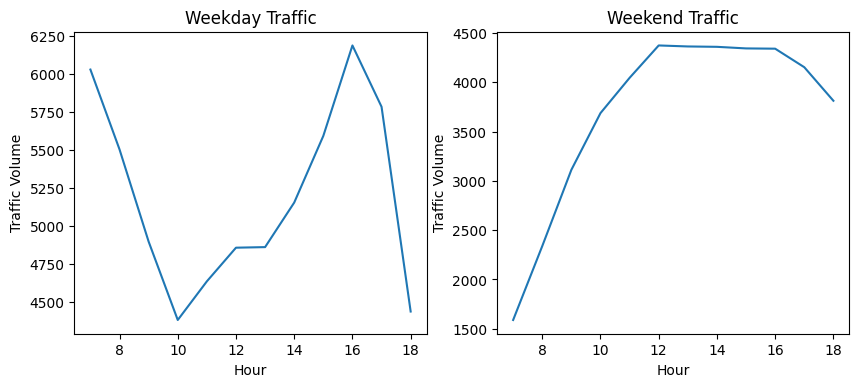

In [17]:
#Plot line plots for both weekdays and weekends
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Weekday Traffic')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekend Traffic')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

We can now summarize that traffic volume is higher during business days rather than on weekends. Furthermore on weekdays traffic volume is highest at 7am and 4pm when people are commuting to work in the morning and leaving in the evening.

In [18]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

# Weather indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

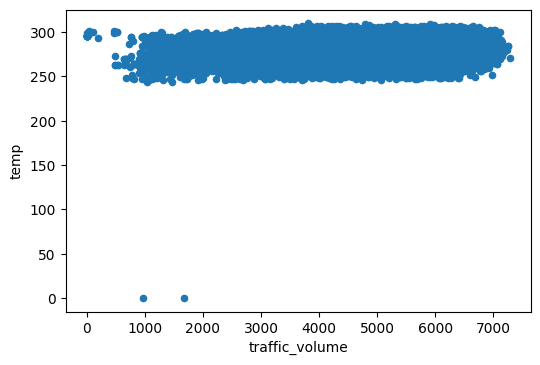

In [19]:
daytime.plot.scatter(x='traffic_volume',y='temp')

There is no reliable indicator of heavy traffic based on this scatter plot. To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

# Weather types

We're going to calculate the average traffic volume associated with each unique value in these two columns. We've already calculated the values for you — we grouped the data by weather_main and weather_description while using the mean as an aggregate function.

In [20]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

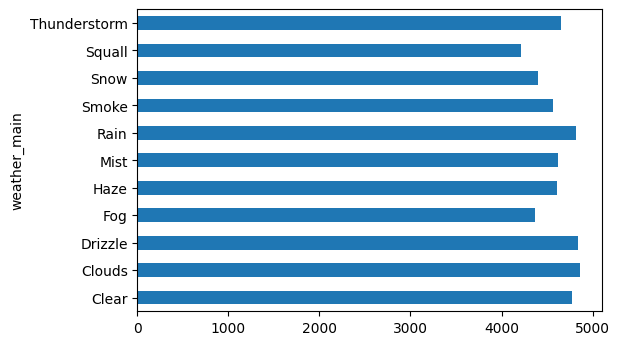

In [21]:
by_weather_main['traffic_volume'].plot.barh()

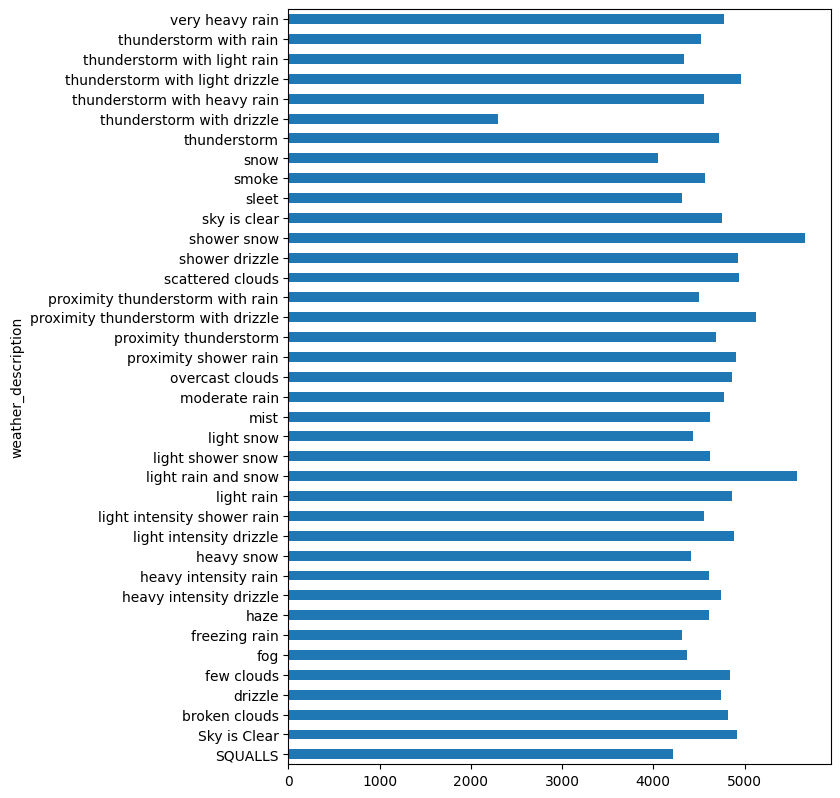

In [22]:
by_weather_description['traffic_volume'].plot.barh(figsize=(7,10))

# Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

1. Time indicators

   a) The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
   b) The traffic is usually heavier on business days compared to the weekends.
   c) On business days, the rush hours are around 7 and 16.

2. Weather indicators

   a) Shower snow
   b) Light rain and snow
   c) Proximity thunderstorm with drizzle